# Help Twitter Combat Hate Speech Using NLP and Machine Learning

In [1]:
# Import all Important and needed liabraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import string
import re
import nltk
stopwords = nltk.corpus.stopwords.words('English')
ps = nltk.PorterStemmer()

import warnings 
warnings.filterwarnings('ignore')

### 1.Load the tweets file using read_csv function from Pandas package. 

In [2]:
path = 'C:/Users/91805/Documents/Kalpesh Mahajan/Natuaral Language Processing Class/Project 1  Help Twitter Combat Hate Speech Using NLP and Machine Learning/TwitterHate.csv'
TweetData = pd.read_csv(path)

In [3]:
# Looking at the first few records.
TweetData.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
# Shape
TweetData.shape
# Total No of Rows = 31962
# Total No of Columns = 3

(31962, 3)

In [5]:
# Checking Null Values of any
TweetData.isnull().any()
# Conclusion there is no column with null values in it.

id       False
label    False
tweet    False
dtype: bool

In [6]:
# Check the Attributes or MetaData of the Data.
print(TweetData.info())
print('------------------Check Duplicate Entries in each coumns--------------------------')
print('Unique entries in id:',TweetData.id.value_counts().sum())
print('Unique entries in label:',TweetData.label.value_counts().sum())
print('Unique entries in tweet:',TweetData.tweet.value_counts().sum())
print('-----------------------------------------------------------------------------------')
# Conclusions:
# 1. Id column is having Data type int and no null values.
# 2. label column is having Data type int and no null values
# 3. tweet column is having Data type object and no null values.
# 4. There are no missing values in any column
# 5. There are no duplicate entries in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None
------------------Check Duplicate Entries in each coumns--------------------------
Unique entries in id: 31962
Unique entries in label: 31962
Unique entries in tweet: 31962
-----------------------------------------------------------------------------------


   label
0  29720
1   2242


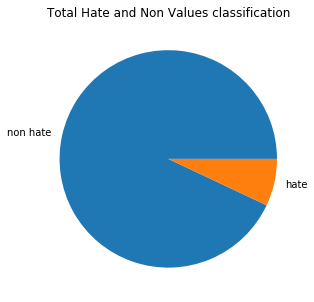

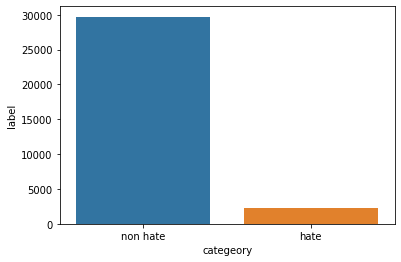

In [7]:
# Check the categerories 
PieData = pd.DataFrame(TweetData.label.value_counts())
print(PieData)

#=========================================Check using pie Plot====================================================
plt.figure(figsize=(5,5))
plt.pie(PieData,labels=['non hate','hate'])
plt.title("Total Hate and Non Values classification")
plt.show()

#=========================================Check using Bar Plot====================================================
PieData["categeory"] = pd.Series(['non hate','hate'])
sns.barplot(x='categeory',y='label',data=PieData)
# Conclusion : The output is imbalanced.

The function cleanup will perform below tasks.
1. Convert all the words into lowercase
2. Remove the redundant workd 'rt' from data
3. Remove the redundant word 'amp' from data
4. Remove the user handles starting with @ and sometimes ending with colan.
5. Remove the '#' tags from the data.
6. Remove all the punctuations.
7. Remove repeated special characters from the text.
8. Perfrom Tokenization.
9. Perform Stemming of the words and remove the stopwords.
10. Remove the words with length 1
11. Only return the alphabetic data.

In [8]:
def cleanup(text):
    
    # Make all words in lower case
    text = [word.lower() for word in text]
    
    # Remove redundant term rt 
    OperationA = [re.sub(r'^rt',' ',tweet) for tweet in text]
    
    # Remove reduadant term amp from the text 
    OperationB = [re.sub(r'amp',' ',tweet) for tweet in OperationA]
    
    #User Handle Removed
    Operation1 = [re.sub('@\w+|@w+:','',words) for words in OperationB]
    
    # Remove '#' tag from the text and retain the word.
    Operation2 = [re.sub('#',' ',words) for words in Operation1]
    
   
    # Remove URLs from the text
    Operation3 = [re.sub('http:\/\/\w.+|https:\/\/\w.+','',words) for words in Operation2]
    
    #Remove Repeated Special Characters from the text.
    
    Operation4 = [re.sub('[\\,--,!+,*,..,:]+','',words) for words in Operation3]
    
    # Remove the Punctuations from the text
    Operation5 = "".join([word.lower() for word in Operation4 if word not in string.punctuation])
    
   
    # Tokenize the text
    tokens = nltk.word_tokenize(Operation5)
    
    # Stem the words and Remove the stopwords.
    Operation6 = [ps.stem(word) for word in tokens if word not in stopwords]
    
    # Remove the words with Lengh 1
    Operation7 = [word for word in Operation6 if len(word) > 1 ]
    
    # Consider only Aplphabetic words 
    
    Operation8 = [word for word in Operation7 if str(word).isalpha() is True]
    return(Operation8)

### 2. Feature Engineering using TD-IDF vectorizer to find 10 most common terms used in data.

In [10]:
# Use the counter and find the 10 most common terms.
from sklearn.feature_extraction.text import TfidfVectorizer

TF_IDF_Vec = TfidfVectorizer(analyzer=cleanup,max_features=10)
X_tfidf1 = TF_IDF_Vec.fit_transform(TweetData.tweet)

In [11]:
# Get and print 10 most common test.

Top10MostCommonTerms = TF_IDF_Vec.get_feature_names()
Top10MostCommonTerms

['amp', 'day', 'get', 'go', 'happi', 'im', 'love', 'thank', 'time', 'user']

In [12]:
# Create X Data using TFIDF vectorizer.

TF_IDF_Vec1 = TfidfVectorizer(analyzer=cleanup,max_features=5000)
X_Final = TF_IDF_Vec1.fit_transform(TweetData.tweet)

In [13]:
# Prepare the X Features

from sklearn.model_selection import train_test_split

XFeatures = pd.DataFrame(X_Final.toarray())

X_train,X_test,y_train,y_test = train_test_split(XFeatures,TweetData.label,random_state = 123,train_size = 0.8)

In [14]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(25569, 5000) (6393, 5000) (25569,) (6393,)


### 3. Logistic Regression Model.

In [15]:
# This step will help finding us Generalized model.
# We will be able to find the Random state value which is generating the Test Score of the model greater than Train Score

from sklearn.linear_model import LogisticRegression

for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(XFeatures,TweetData.label,random_state = i,train_size = 0.8)

    Log_reg_model = LogisticRegression(random_state=1)
    Log_reg_model.fit(X_train,y_train)

    Log_reg_train_score = Log_reg_model.score(X_train,y_train)
    Log_reg_test_score  = Log_reg_model.score(X_test,y_test)
    
    if Log_reg_test_score > Log_reg_train_score:
        print (" Test Score :{} Train Score: {} for random state: {}".format(Log_reg_test_score,Log_reg_train_score,i))

 Test Score :0.9554199906147348 Train Score: 0.9549845516054597 for random state: 17
 Test Score :0.9565149382136712 Train Score: 0.9545934530095037 for random state: 49
 Test Score :0.9544814641013608 Train Score: 0.9543587938519301 for random state: 70


In [16]:
# Perfrom Train Test Split with random state found in above step.

X_train,X_test,y_train,y_test = train_test_split(XFeatures,TweetData.label,random_state = 70,train_size = 0.8)
Log_reg_model = LogisticRegression(random_state=1)
Log_reg_model.fit(X_train,y_train)

Log_reg_train_score = Log_reg_model.score(X_train,y_train)
Log_reg_test_score  = Log_reg_model.score(X_test,y_test)

Log_reg_y_pred_test = Log_reg_model.predict(X_test)
Log_reg_y_pred_train = Log_reg_model.predict(X_train)

print("Log Reg Train Score:",Log_reg_train_score)
print("Log Reg Test Score:", Log_reg_test_score)

Log Reg Train Score: 0.9543587938519301
Log Reg Test Score: 0.9544814641013608


In [17]:
# Lets Evaluate the model using confusion Matrix and Classification Report.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("====================Confusion Matrics and Classification Report for Test Data====================================")
print(confusion_matrix(y_test,Log_reg_y_pred_test))
print("=================================================================================================================")
print(classification_report(y_test,Log_reg_y_pred_test))
print("====================Confusion Matrics and Classification Report for Train Data====================================")
print(confusion_matrix(y_train,Log_reg_y_pred_train))
print("=================================================================================================================")
print(classification_report(y_train,Log_reg_y_pred_train))

====================Confusion Matrics and Classification Report for Test Data====================================
[[5948   11]
 [ 280  154]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5959
           1       0.93      0.35      0.51       434

    accuracy                           0.95      6393
   macro avg       0.94      0.68      0.75      6393
weighted avg       0.95      0.95      0.94      6393

====================Confusion Matrics and Classification Report for Train Data====================================
[[23722    39]
 [ 1128   680]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     23761
           1       0.95      0.38      0.54      1808

    accuracy                           0.95     25569
   macro avg       0.95      0.69      0.76     25569
weighted avg       0.95      0.95      0.95     25569



Conclusions.
1. We have Train Score of 0.95
2. We have Test Score of 0.96
3. We have Test Score > Train score hence we have generalized model

Although we have generalized model as this is case of class imbalance we need to adjust class imbalance using SMOT as below and try to find best model. 


## 4. Adjusting class imbalance with SMOT and build model using logistic regression

In [18]:
from imblearn.over_sampling import SMOTE
#?SMOTE

In [19]:
smote1 = SMOTE(random_state=42)
#XSM_train,XSM_test = smote1.fit_sample(X_train,y_train)
#(X_train,y_train)

In [20]:
X_res,y_res = smote1.fit_resample(X_train,y_train)

In [21]:
print('=================Before Sampling Shape======================')
print(X_train.shape,y_train.shape)
print(sum(y_train==0))
print(sum(y_train==1))
print('=================After Sampling Shape======================')
print(X_res.shape,y_res.shape)
print(sum(y_res==0))
print(sum(y_res==1))

=================Before Sampling Shape======================
(25569, 5000) (25569,)
23761
1808
=================After Sampling Shape======================
(47522, 5000) (47522,)
23761
23761


In [22]:
# Train the model once again with new Training samples.


Log_reg_model_res = LogisticRegression(random_state=1)
Log_reg_model_res.fit(X_res,y_res)

Log_reg_train_score_res = Log_reg_model_res.score(X_res,y_res)
Log_reg_test_score_res  = Log_reg_model_res.score(X_test,y_test)

Log_reg_y_pred_test_res = Log_reg_model_res.predict(X_test)
Log_reg_y_pred_train_res = Log_reg_model_res.predict(X_res)
    
print("Log Reg Train Score:",Log_reg_train_score_res)
print("Log Reg Test Score:", Log_reg_test_score_res)

Log Reg Train Score: 0.9586296873027229
Log Reg Test Score: 0.904895979978101


In [23]:
# Lets evaluate the model using Classification report and confusion matrix.

print("====================Confusion Matrics and Classification Report for Test Data====================================")
print(confusion_matrix(y_test,Log_reg_y_pred_test))
print("=================================================================================================================")
print(classification_report(y_test,Log_reg_y_pred_test))
print("====================Confusion Matrics and Classification Report for Test Data====================================")
print(confusion_matrix(y_res,Log_reg_y_pred_train_res))
print("=================================================================================================================")
print(classification_report(y_res,Log_reg_y_pred_train_res))

====================Confusion Matrics and Classification Report for Test Data====================================
[[5948   11]
 [ 280  154]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5959
           1       0.93      0.35      0.51       434

    accuracy                           0.95      6393
   macro avg       0.94      0.68      0.75      6393
weighted avg       0.95      0.95      0.94      6393

====================Confusion Matrics and Classification Report for Test Data====================================
[[22264  1497]
 [  469 23292]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     23761
           1       0.94      0.98      0.96     23761

    accuracy                           0.96     47522
   macro avg       0.96      0.96      0.96     47522
weighted avg       0.96      0.96      0.96     47522



### 5. Try finding out Better model using Cross Valuation Score and Stratified K fold split.

As the class is imbalanced we need to use Startified K fold spit before we go ahed with Hyperparameter Tuning.

Label 0 Count :   29720
Label 1 Count :   2242

We will perform below steps to try finding better model handling class imbalance.

1. Cross Val Score : try finding out the logistic regression model with cross val score with sample split of 10.Try getting min ,max and average accuracy scores using the Cross Val Score.

2. Stratified K fold Split : We will use the Stratified K fold split to find out best train test set which is giving Generalized model with accuracy score greater than average accuracy score. 

3. Train and Test the Logistic Regression Model : This step will train and test the Logistic regression model using best train and test split we have obtained in step 2.

4. Evaluate the model : We will finally evaluate the model using confusion matrics and classificaiotn report to check accuracy score , F1 socre and other parameters and also see if we have got the generalized model.

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


In [25]:
# Get Featues and Class Labels into X and Y respectively for further processing. The format Numpy is specifically used in order to
# perform faster processing.

Y = TweetData.label.to_numpy()
X= XFeatures.to_numpy()

In [26]:
LR = LogisticRegression(random_state=1)

results = cross_val_score(LR,X,Y,cv=10)
print('Minimum Results obtained using CV=10 :',np.min(results))
print('Average Accuracy obtained using CV=10:',np.mean(results))
print('Maximum Accuracy obtained using CV=10:',np.max(results))
print('--------------------------------------------------------')
print(results)

Minimum Results obtained using CV=10 : 0.9489987484355444
Average Accuracy obtained using CV=10: 0.9516926949271513
Maximum Accuracy obtained using CV=10: 0.9565081351689612
--------------------------------------------------------
[0.95120425 0.95026587 0.95025031 0.95650814 0.95400501 0.95275344
 0.94899875 0.95118899 0.95118899 0.9505632 ]


In [27]:
# lets Apply the stratified K fold split to get best train test split preserving the Class balance.

from sklearn.model_selection import StratifiedKFold
SKF = StratifiedKFold(n_splits=10,random_state=1, shuffle=True)

i=0
for train_index,test_index in SKF.split(X,Y):
    i=i+1 # Increate the counter with every iterations.
     
    X_train_SKF,X_test_SKF = X[train_index],X[test_index]
    y_train_SKF,y_test_SKF = Y[train_index],Y[test_index]
    
    LR.fit(X_train_SKF,y_train_SKF)
    
    #y_pred_SKF = LR.predict(y_test_SKF)
    
    if LR.score(X_test_SKF,y_test_SKF) > 0.9516926949271513:
        print('Test Score : {} Train Score : {} for Sample Split :{} : '.format(LR.score(X_test_SKF,y_test_SKF),
                                                                               LR.score(X_train_SKF,y_train_SKF),i))

Test Score : 0.9533792240300375 Train Score : 0.9565111590071612 for Sample Split :3 : 
Test Score : 0.9530663329161452 Train Score : 0.9565806855315303 for Sample Split :5 : 
Test Score : 0.9518147684605757 Train Score : 0.9572411875130362 for Sample Split :7 : 
Test Score : 0.9540050062578223 Train Score : 0.9566502120558993 for Sample Split :8 : 
Test Score : 0.9524405506883604 Train Score : 0.9569978446777445 for Sample Split :9 : 
Test Score : 0.9518147684605757 Train Score : 0.9564068692206077 for Sample Split :10 : 


Conclusions

1. From Above its clear that we still do not have true generalized model having Test score greater than Train Score.
2. The best train test sample cab be obtained for CV=8
3. In below step we will build the final Model with best Train test sample.


In [28]:
#Final model using best training and testing samples.

# Initializs the Stratified K fold split.
from sklearn.model_selection import StratifiedKFold
SKF = StratifiedKFold(n_splits=10,random_state=1, shuffle=True)

# Below for loop will pick the Train Test split for Split value 8 as we had good test score from above step results 
# for shuffle split 8

i=0
for train_index,test_index in SKF.split(X,Y):
    i=i+1 # Increate the counter with every iterations.
     
    X_train_SKF,X_test_SKF = X[train_index],X[test_index]
    y_train_SKF,y_test_SKF = Y[train_index],Y[test_index]
    
    LR.fit(X_train_SKF,y_train_SKF)
    
     # Get the values into Final Variables.
    if i == 8:
        X_train_final = X_train_SKF
        X_test_final  = X_test_SKF
        y_train_final = y_train_SKF
        y_test_final  = y_test_SKF

# Fit the model on best Training samples.

LR.fit(X_train_final,y_train_final)

# Print the score for info purpose.
print('==========================MODEL SCORES =========================================')
print ('Test Score : {} Train Score {} '.format(LR.score(X_test_final,y_test_final),LR.score(X_train_final,y_train_final)))

# Predict the value

y_pred_final=LR.predict(X_test_final)

print('==========================CONFUSION MATRICS=====================================')
print(confusion_matrix(y_test_final,y_pred_final))
print('==========================CLASSIFICATION REPORT=================================')
print(classification_report(y_test_final,y_pred_final))

==========================MODEL SCORES =========================================
Test Score : 0.9540050062578223 Train Score 0.9566502120558993 
==========================CONFUSION MATRICS=====================================
[[2966    6]
 [ 141   83]]
==========================CLASSIFICATION REPORT=================================
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2972
           1       0.93      0.37      0.53       224

    accuracy                           0.95      3196
   macro avg       0.94      0.68      0.75      3196
weighted avg       0.95      0.95      0.94      3196



Conclusion: We still don't have the generalized model. Lets try improving the accuracy score using hyperparameter tuning.

### 6. Hyperparameter Tuning.

In [29]:
# Hyperparameter Tunning for the model.
from sklearn.model_selection import GridSearchCV

# Define the Parameter Grid using Dictionary Object.
ParameterGrid = [ {'penalty': ['l2'],'solver': ['newton-cg','lbfgs','sag']} ,
                 {'penalty': ['l1','l2'],'solver':['liblinear','saga']} ]
               
# Create GridSearchCV Object.

GSCV = GridSearchCV(LR,ParameterGrid,n_jobs=-1,cv=4,verbose=3)

# Fit the GridSearch CV on X and Y variables.

GSCV.fit(X,Y)


Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  28 | elapsed: 18.7min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed: 22.2min finished


GridSearchCV(cv=4, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid=[{'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'sag']},
                         {'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']}],
             verbose=3)

In [30]:
GSCV.best_estimator_

LogisticRegression(penalty='l1', random_state=1, solver='liblinear')

In [31]:
GSCV.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [32]:
# lets use the parameters we have got above and play with Parameter C.

FinalLogReg = LogisticRegression(penalty='l1', random_state=1, solver='liblinear')
FinalLogReg.fit(X,Y)

# Print the model Score.
print('==========================================Model Score======================================================')
print(FinalLogReg.score(X,Y))

# Predict the Y value based on X values with Final Model.
y_pred_final_Hyp = FinalLogReg.predict(X)

# Confusion Matrics.
print('==========================================Confusion Matrics================================================')
print(confusion_matrix(Y,y_pred_final_Hyp))
# Classification Report.
print('==========================================Classification Report============================================')
print(classification_report(Y,y_pred_final_Hyp))

==========================================Model Score======================================================
0.9638946248670296
==========================================Confusion Matrics================================================
[[29608   112]
 [ 1042  1200]]
==========================================Classification Report============================================
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     29720
           1       0.91      0.54      0.68      2242

    accuracy                           0.96     31962
   macro avg       0.94      0.77      0.83     31962
weighted avg       0.96      0.96      0.96     31962



### Final Conclusion of model

Conclusion:
    1. With the final model we have got the accuracy score of 96.
    2. The recall value of class '1' has been also improved to 0.54 which was below 0.40 for other old models.
    3. The F1 Score has also improved to 0.68 from 0.53 and below for other models
    

### Testing with a sample Tweet

Lets Test the model with sample input. The input tweet is taken from input data only for which the label is already available.

Testing Tweets are as below : 


Record no 3,Tweet - "i get to see my daddy today!!   #80days #gettingfed" , Label = 0(non-hate)


Record no 363,Tweet - "trump ny co-chair makes racist remarks about michelle obama  #p2 #p21 #fyi  #tcot", Label = 1 (hate)

In [59]:
# Accept the input from the User
# Test Case : Non Hate Tweet.
TestTweet = input("Enter the Tweet :")

# Display the accepted input to the user.
print("---------------------------------------------------------------------------------------------------------------")
print("You have entered the Tweet :"'"',TestTweet,'"')
TestTweetDF = pd.DataFrame(pd.Series(TestTweet))

print("---------------------------------------------------------------------------------------------------------------")

# Perform cleaning and conversion into TF-IDF features.

TF_IDF_VecTest = TfidfVectorizer(analyzer=cleanup,max_features=5000)
XUserTest = TF_IDF_Vec1.transform(TestTweetDF.iloc[:,0])
XUserFeatureTest = pd.DataFrame(XUserTest.toarray())

print("---------------------------------------------------------------------------------------------------------------")
print("The model returned lable value is:",FinalLogReg.predict(XUserFeatureTest))
print("---------------------------------------------------------------------------------------------------------------")

if FinalLogReg.predict(XUserFeatureTest) == 0:
    print("The Tweet is non hate Tweet")
else:
    print("The Tweet is hate Tweet")


Enter the Tweet :i get to see my daddy today!! #80days #gettingfed
---------------------------------------------------------------------------------------------------------------
You have entered the Tweet :" i get to see my daddy today!! #80days #gettingfed "
---------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------
The model returned lable value is: [0]
---------------------------------------------------------------------------------------------------------------
The Tweet is non hate Tweet


In [60]:
# Accept the input from the User
# Test Case : Hate Tweet.
TestTweet = input("Enter the Tweet :")

# Display the accepted input to the user.
print("---------------------------------------------------------------------------------------------------------------")
print("You have entered the Tweet :"'"',TestTweet,'"')
TestTweetDF = pd.DataFrame(pd.Series(TestTweet))
print("---------------------------------------------------------------------------------------------------------------")

# Perform cleaning and conversion into TF-IDF features.

TF_IDF_VecTest = TfidfVectorizer(analyzer=cleanup,max_features=5000)
XUserTest = TF_IDF_Vec1.transform(TestTweetDF.iloc[:,0])
XUserFeatureTest = pd.DataFrame(XUserTest.toarray())
print("---------------------------------------------------------------------------------------------------------------")
print("The model returned lable value is:",FinalLogReg.predict(XUserFeatureTest))
print("---------------------------------------------------------------------------------------------------------------")
if FinalLogReg.predict(XUserFeatureTest) == 0:
    print("The Tweet is non hate Tweet")
else:
    print("The Tweet is hate Tweet")


Enter the Tweet :trump ny co-chair makes racist remarks about michelle obama #p2 #p21 #fyi #tcot
---------------------------------------------------------------------------------------------------------------
You have entered the Tweet :" trump ny co-chair makes racist remarks about michelle obama #p2 #p21 #fyi #tcot "
---------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------
The model returned lable value is: [1]
---------------------------------------------------------------------------------------------------------------
The Tweet is hate Tweet


In [63]:
# Export the model using pickle.
import pickle
filename = 'twitterhatemodel'
outfil = open(filename,'wb')
pickle.dump(TF_IDF_Vec1,outfil)
pickle.dump(FinalLogReg,outfil)